In [1]:
import pandas as pd
import numpy as np
import datetime as dt    
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/data/superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df['Customer ID'].duplicated().value_counts()

True     9201
False     793
Name: Customer ID, dtype: int64

In [5]:
LTV = df.groupby('Customer ID').Profit.sum().to_frame().rename({'Profit': 'LTV'}, axis = 1)

In [6]:
df = df.merge(LTV, on='Customer ID', how='left')

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,LTV
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,169.9344
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,169.9344
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,-427.1840
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-81.0858
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,-81.0858


In [8]:
min_date = df.groupby('Customer ID')['Order Date'].min().to_frame().rename({'Order Date':'Start Date'}, axis=1)

In [9]:
min_date

,Start Date
Customer ID,
AA-10315,2014-03-31
AA-10375,2014-04-21
AA-10480,2014-05-04
AA-10645,2014-06-22
AB-10015,2014-02-18
AB-10060,2015-09-18
AB-10105,2014-12-20
AB-10150,2014-03-05
AB-10165,2014-11-16


In [10]:
df = df.merge(min_date, on='Customer ID', how = 'left')

In [11]:
df['Lifetime'] = pd.to_datetime('today') - df['Start Date']

In [28]:
df.sort_values(by=['Customer ID']).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,LTV,Start Date,Lifetime,num_purchases,Cohort
2229,2230,CA-2014-128055,2014-03-31,2014-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880,-362.8825,2014-03-31,2043 days 16:07:01.271979,5,2014-1
1160,1161,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,Minneapolis,...,Avery Binding System Hidden Tab Executive Styl...,11.540,2,0.0,5.7700,-362.8825,2014-03-31,2043 days 16:07:01.271979,5,2014-1
2230,2231,CA-2014-128055,2014-03-31,2014-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,Fellowes Advanced Computer Series Surge Protec...,52.980,2,0.0,14.8344,-362.8825,2014-03-31,2043 days 16:07:01.271979,5,2014-1
1159,1160,CA-2017-147039,2017-06-29,2017-07-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,Minneapolis,...,"Belkin 325VA UPS Surge Protector, 6'",362.940,3,0.0,90.7350,-362.8825,2014-03-31,2043 days 16:07:01.271979,5,2014-1
7469,7470,CA-2014-138100,2014-09-15,2014-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,"Master Caster Door Stop, Large Neon Orange",14.560,2,0.0,6.2608,-362.8825,2014-03-31,2043 days 16:07:01.271979,5,2014-1


In [12]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,LTV,Start Date,Lifetime
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,169.9344,2015-10-15,1480 days 16:07:01.271979


In [13]:
df = df.merge(df.groupby('Customer ID')['Order ID'].nunique().to_frame().rename({'Order ID':'num_purchases'}, axis=1), on='Customer ID', how='left')

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,LTV,Start Date,Lifetime,num_purchases
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,169.9344,2015-10-15,1480 days 16:07:01.271979,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,169.9344,2015-10-15,1480 days 16:07:01.271979,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,-427.1840,2016-06-12,1239 days 16:07:01.271979,5
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-81.0858,2015-10-11,1484 days 16:07:01.271979,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,-81.0858,2015-10-11,1484 days 16:07:01.271979,6


In [15]:
pd.DatetimeIndex(df['Start Date']).month[0]

10

In [16]:
df['Start Date'].dt.strftime('%Y')[0]

'2015'

In [17]:
conditions =[
    pd.DatetimeIndex(df['Start Date']).month < 7,
    pd.DatetimeIndex(df['Start Date']).month > 6
]

results = [
    df['Start Date'].dt.strftime('%Y') + '-1',
    df['Start Date'].dt.strftime('%Y') + '-2'
]

In [18]:
df['Cohort'] = np.select(conditions, results, 'Other')

In [19]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,LTV,Start Date,Lifetime,num_purchases,Cohort
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2


In [20]:
df[df['Customer ID'] == 'CG-12520']['Order Date']

0      2016-11-08
1      2016-11-08
5491   2017-01-26
6877   2015-10-15
6878   2015-10-15
Name: Order Date, dtype: datetime64[ns]

In [21]:
repeat = df.groupby('Customer ID')['Order ID'].nunique()>1

In [29]:
df = df.merge(repeat.to_frame().rename({'Order ID':'Repeat'}, axis = 1), on='Customer ID', how='left')

In [30]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,LTV,Start Date,Lifetime,num_purchases,Cohort,Repeat
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.96,2,0.0,41.9136,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2,True
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.94,3,0.0,219.5820,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2,True


In [31]:
df = df.merge(df.groupby('Customer ID').Segment.agg(pd.Series.mode).to_frame().rename({'Segment':'Seg_common'}, axis=1), on='Customer ID', how='left')

In [32]:
three_mo_offset = pd.DateOffset(months=3)

In [33]:
three_months = df.groupby('Customer ID')['Order Date'].min() + three_mo_offset

In [34]:
df = df.merge(three_months.to_frame().rename({'Order Date':'three_months'}, axis = 1), on='Customer ID', how='left')

In [35]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,LTV,Start Date,Lifetime,num_purchases,Cohort,Repeat,Seg_common,three_months
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.0,41.9136,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2,True,Consumer,2016-01-15


In [36]:
one_year_offset = pd.DateOffset(years=1)

In [37]:
one_year = df.groupby('Customer ID')['Order Date'].min() + one_year_offset

In [38]:
df = df.merge(one_year.to_frame().rename({'Order Date':'one_year'}, axis = 1), on='Customer ID', how='left')

In [39]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Profit,LTV,Start Date,Lifetime,num_purchases,Cohort,Repeat,Seg_common,three_months,one_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.9136,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2,True,Consumer,2016-01-15,2016-10-15


In [40]:
second_order_in_3_months = df[(df['Order Date'] >= df['Start Date']) 
                              & (df['Order Date'] <= df['three_months'
                                                       ])].groupby('Customer ID')['Order ID'].nunique() > 1

In [41]:
df = df.merge(second_order_in_3_months.to_frame().rename({'Order ID': 'second_90_D_order'}, axis=1), on='Customer ID', how='left')

In [42]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,LTV,Start Date,Lifetime,num_purchases,Cohort,Repeat,Seg_common,three_months,one_year,second_90_D_order
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2,True,Consumer,2016-01-15,2016-10-15,False


In [43]:
df.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'LTV',
 'Start Date',
 'Lifetime',
 'num_purchases',
 'Cohort',
 'Repeat',
 'Seg_common',
 'three_months',
 'one_year',
 'second_90_D_order']

In [44]:
df = df.merge(df[df['Order Date'] <= df['one_year']].groupby('Customer ID')['Order ID'].nunique().to_frame().rename(
    {'Order ID':'num_orders_one_year'}, axis=1), on='Customer ID', how='left')

In [45]:
df = df.merge(df[df['Order Date'] <= df['one_year']].groupby('Customer ID')['Sales'].sum().to_frame().rename(
{'Sales': 'one_year_sales'}, axis=1), on='Customer ID', how='left')

In [46]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Lifetime,num_purchases,Cohort,Repeat,Seg_common,three_months,one_year,second_90_D_order,num_orders_one_year,one_year_sales
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,1480 days 16:07:01.271979,3,2015-2,True,Consumer,2016-01-15,2016-10-15,False,1,136.7200
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,1480 days 16:07:01.271979,3,2015-2,True,Consumer,2016-01-15,2016-10-15,False,1,136.7200
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,1239 days 16:07:01.271979,5,2016-1,True,Corporate,2016-09-12,2017-06-12,False,2,37.6000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,1484 days 16:07:01.271979,6,2015-2,True,Consumer,2016-01-11,2016-10-11,True,2,1774.5195
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,1484 days 16:07:01.271979,6,2015-2,True,Consumer,2016-01-11,2016-10-11,True,2,1774.5195


In [47]:
df2 = df[df.columns.to_list()[-12:]]

In [48]:
df2.shape

(9994, 12)

In [49]:
df2 = df2.drop_duplicates()

In [50]:
df2.shape

(793, 12)

**What percentage of customers make a second purchase within 3 months after their first one?  How does this differ by customer segment?**

In [51]:
df2['second_90_D_order'].mean()

0.23329129886506936

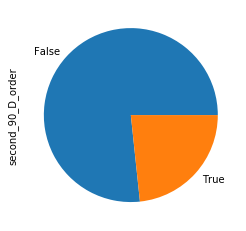

In [52]:
df2['second_90_D_order'].value_counts().plot.pie()

In [53]:
df.groupby('Segment')[
    'second_90_D_order'
].mean()

Segment
Consumer       0.304180
Corporate      0.238742
Home Office    0.250140
Name: second_90_D_order, dtype: float64

**How Has the 3-Month Repurchasing Rate Been Changing Across Cohorts?**

In [54]:
df2.groupby('Cohort')['second_90_D_order'].mean()

Cohort
2014-1    0.181495
2014-2    0.280255
2015-1    0.176471
2015-2    0.264706
2016-1    0.333333
2016-2    0.133333
2017-1    0.200000
2017-2    0.166667
Name: second_90_D_order, dtype: float64

**What impact does a second order within 3 months of 1st purchase have on lifetime customer value?  Does this effect hold true for each customer segment?**

In [55]:
df2.groupby('second_90_D_order').LTV.mean()

second_90_D_order
False    318.540184
True     501.213998
Name: LTV, dtype: float64

In [56]:
df2.groupby(['Seg_common','second_90_D_order']).LTV.mean()

Seg_common   second_90_D_order
Consumer     False                289.855800
             True                 441.003246
Corporate    False                357.558873
             True                 509.463674
Home Office  False                331.643163
             True                 682.127237
Name: LTV, dtype: float64

**What's the average expected sales value for a customer one year after their first purchase? How has this changed across cohorts?**

In [57]:
df2.head(1)

,LTV,Start Date,Lifetime,num_purchases,Cohort,Repeat,Seg_common,three_months,one_year,second_90_D_order,num_orders_one_year,one_year_sales
0,169.9344,2015-10-15,1480 days 16:07:01.271979,3,2015-2,True,Consumer,2016-01-15,2016-10-15,False,1,136.72


In [58]:
df.one_year_sales.mean()

1314.6681747148418

In [59]:
df.groupby('Cohort').one_year_sales.mean()

Cohort
2014-1    1334.570650
2014-2    1220.197808
2015-1    1210.697905
2015-2    1220.241747
2016-1    2547.172158
2016-2    1629.539245
2017-1     502.034125
2017-2     989.503467
Name: one_year_sales, dtype: float64

**How much does lifetime customer value differ across the different customer segments?**

In [60]:
df.groupby('Seg_common').LTV.mean()

Seg_common
Consumer       414.510387
Corporate      493.174060
Home Office    508.826059
Name: LTV, dtype: float64